# Colorization

**Fully Convolutional Networks: UNet Version**


In [26]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from PIL import Image
import torchvision.transforms as transforms
from model import unet
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

### Load UNet Model 

In [15]:
def load_model(param_path):
    
    net = unet.UNet()
    net.load_state_dict(torch.load(param_path).cuda())
    
    return net
    

In [4]:
transform_toPIL = transforms.Compose([
    transforms.ToPILImage(),
])

transform_totensor = transforms.Compose([
    transforms.ToTensor()
])
    

In [6]:
def inference(images, net):
    x = Variable(images)
    batch_nums = len(images)
    if batch_nums == 0:
        x = x.unsqueeze(0)
    x = x.unsqueeze(1)
    
    gen_images = net(x)
    
    results = []
    for i in xrange(batch_nums):
        results.append(transform_toPIL(gen_images[i]))
    return results


In [24]:
def load_images(paths):
    images = []
    for path in paths:
        img = cv.imread(path)
        #img = Image.open(path)
        images.append(img)
    return images


In [8]:
def gray(image):
    r = image[0]
    g = image[1]
    b = image[2]
    tensor = 0.299 * r + 0.587 * g + 0.114 * b
    return tensor

def batch_gray(images):
    """
    Grayscale for Batch Images
    :param images: [B, C, H, W]
    :return: [B, H, W]
    """
    batch_size = images.size()[0]
    h = images.size()[2]
    w = images.size()[3]
    result = Variable(torch.zeros([batch_size, h, w]))
    for i in xrange(batch_size):
        result[i] = gray(images[i])

    return result

In [41]:
def show(gen_images, origin_images):
    nums = 4
    def plt_img(img):
        R,G,B = cv.split(img)
        B, G, R = 0,0,0
    plt.figure(figsize=(100,80))
    for i in xrange(nums):
        plt.subplot(nums*2, 1, 2*i)
        plt.imshow(gen_images[i])
        plt.subplot(nums*2, 1, 2*i+1)
        plt.imshow(origin_images[i])


In [19]:
image_dir = 'test_images/'
image_paths = [image_dir+'%s.jpg' % x for x in range(1,5)]

In [20]:
image_paths

['test_images/1.jpg',
 'test_images/2.jpg',
 'test_images/3.jpg',
 'test_images/4.jpg']

In [21]:
# model_param = 'model_params/epoch_18_params.model'
# net = load_model(model_param)

In [27]:
images = load_images(image_paths)

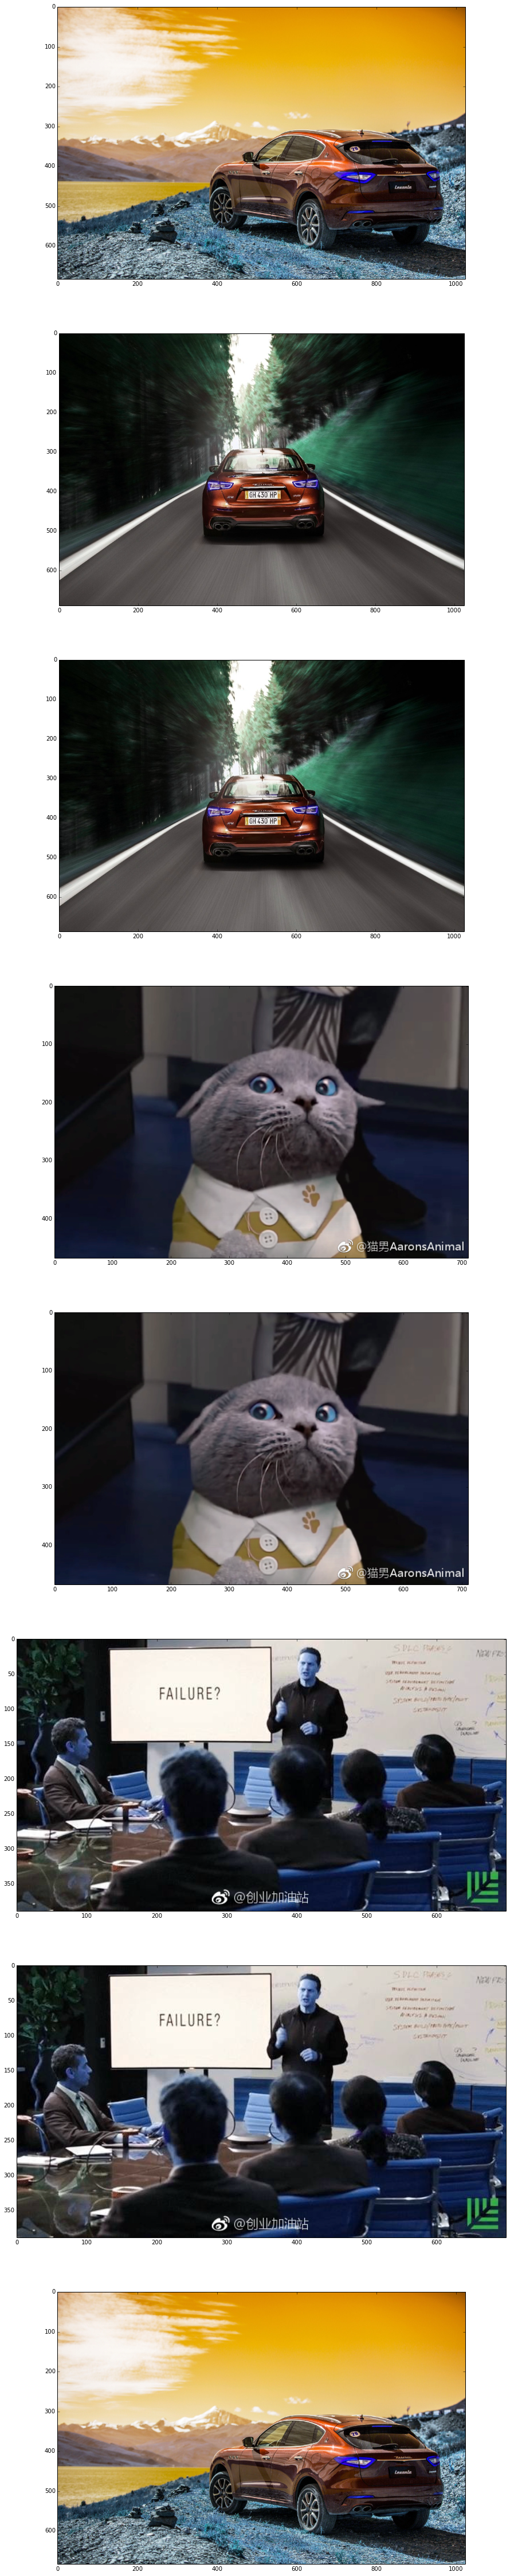

In [42]:
show(images, images)